**Proyecto sobre los factores imprescindibles para el diagnóstico de la diabetes**

# Librerías

In [ ]:
# Dataframes y visualización
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.utils.sparsefuncs import min_max_axis

# Modelado (en caso de)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_auc_score, accuracy_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier # <----- CLASIFICACION
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Hiper-parameter tuning

from sklearn.metrics import mean_absolute_error, mean_squared_error # <----- EVALUACION
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

from sklearn.neural_network import MLPClassifier

import warnings
# Resultados reproducibles
np.random.seed(42)

# Ignorar warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Desarrollo

## Inicializar dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv("diabetes.csv")
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
# Instalar archivo al conectar el entorno de ejecución porque las direcciones de drive son diferentes para todos
#df = pd.read_csv("/content/drive/MyDrive/Aprendizaje Automático/diabetes log.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

Tenemos un set de datos de 9 atributos con 768 registros

## Exploración

In [ ]:
# Buscar datos faltantes
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No hay datos faltantes

In [ ]:
# Ver tipos de datos en cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Todos los atributos son de tipo numérico discretos, sin embargo el BMI y DiabetesPedigreeFuncion son continuos.

In [ ]:
# Determinar cuantos valores diferentes hay por atributo (ver si son numéricos o categorías)
for columna in df.columns:
  print(f'{columna}: {len(df[columna].unique())}')

Pregnancies: 17
Glucose: 136
BloodPressure: 47
SkinThickness: 51
Insulin: 186
BMI: 248
DiabetesPedigreeFunction: 517
Age: 52
Outcome: 2


In [ ]:
df.describe().loc[['min','mean','max']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Todos los atributos son valores numéricos dentro de una escala, sin embargo Outcome es una clase que define categorías (Sí o no)

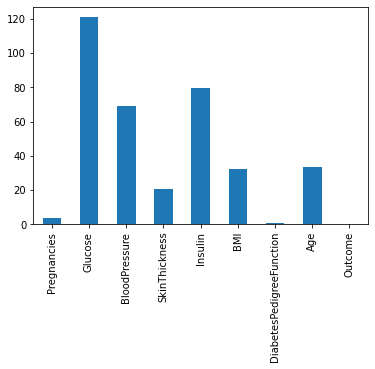

In [ ]:
# Visualizar los promedios de los datos
df.describe().loc['mean'].plot(kind='bar')
plt.show()

Si se buscara hacer un modelo, los diferentes rangos de cada valor harán que éste le dé más importancia a algunos atributos que a otros. Por lo tanto se deberían de normalizar.

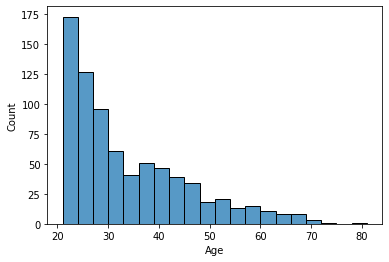

In [ ]:
# Rangos de edad en el dataset
sns.histplot(x='Age',data=df,bins=20)
plt.show()

Comenzando desde los 21 años, cada grupo en un rango de 5 años va decreciendo en cantidad dentro del dataset.

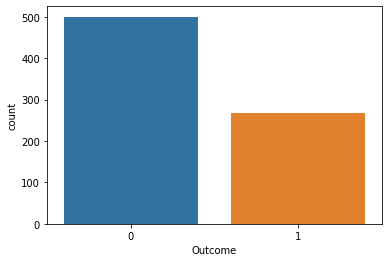

In [ ]:
# Cuántos dentro del dataset salieron positivos a diabetes y cuántos no
sns.countplot(x='Outcome',data=df)
plt.show()

Dentro del set de datos hay más personas que fueron negativas al diagnóstico de diabetes. *Si se quisiera hacer un modelo, se debería de buscar igualar ambos registros tipos dentro de la clase*

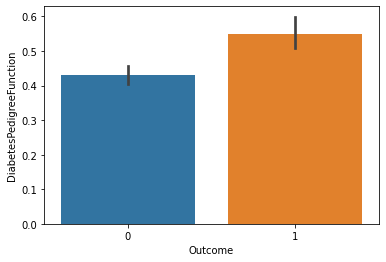

In [ ]:
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=df)
plt.show()

A simple vista pareciera que no hay gran diferencia en *DiabetesPedigreeFunction* para las personas diagnosticadas con diabetes y las que no.

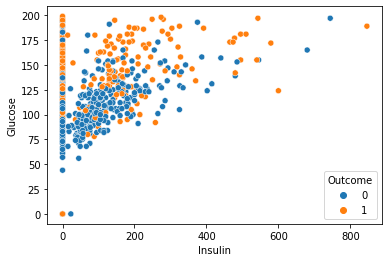

In [ ]:
sns.scatterplot(y='Glucose',x='Insulin',data=df,hue='Outcome',)
plt.show()

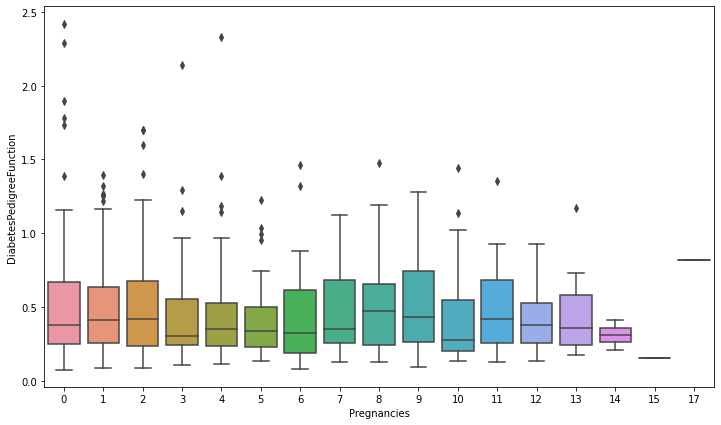

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pregnancies',y='DiabetesPedigreeFunction',data=df)
plt.show()

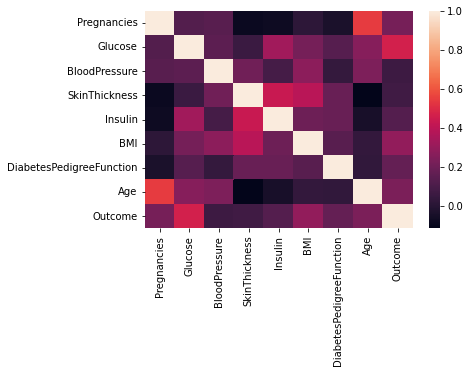

In [ ]:
# Visualizar correlaciones entre diferentes variables
sns.heatmap(df.corr())
plt.show()

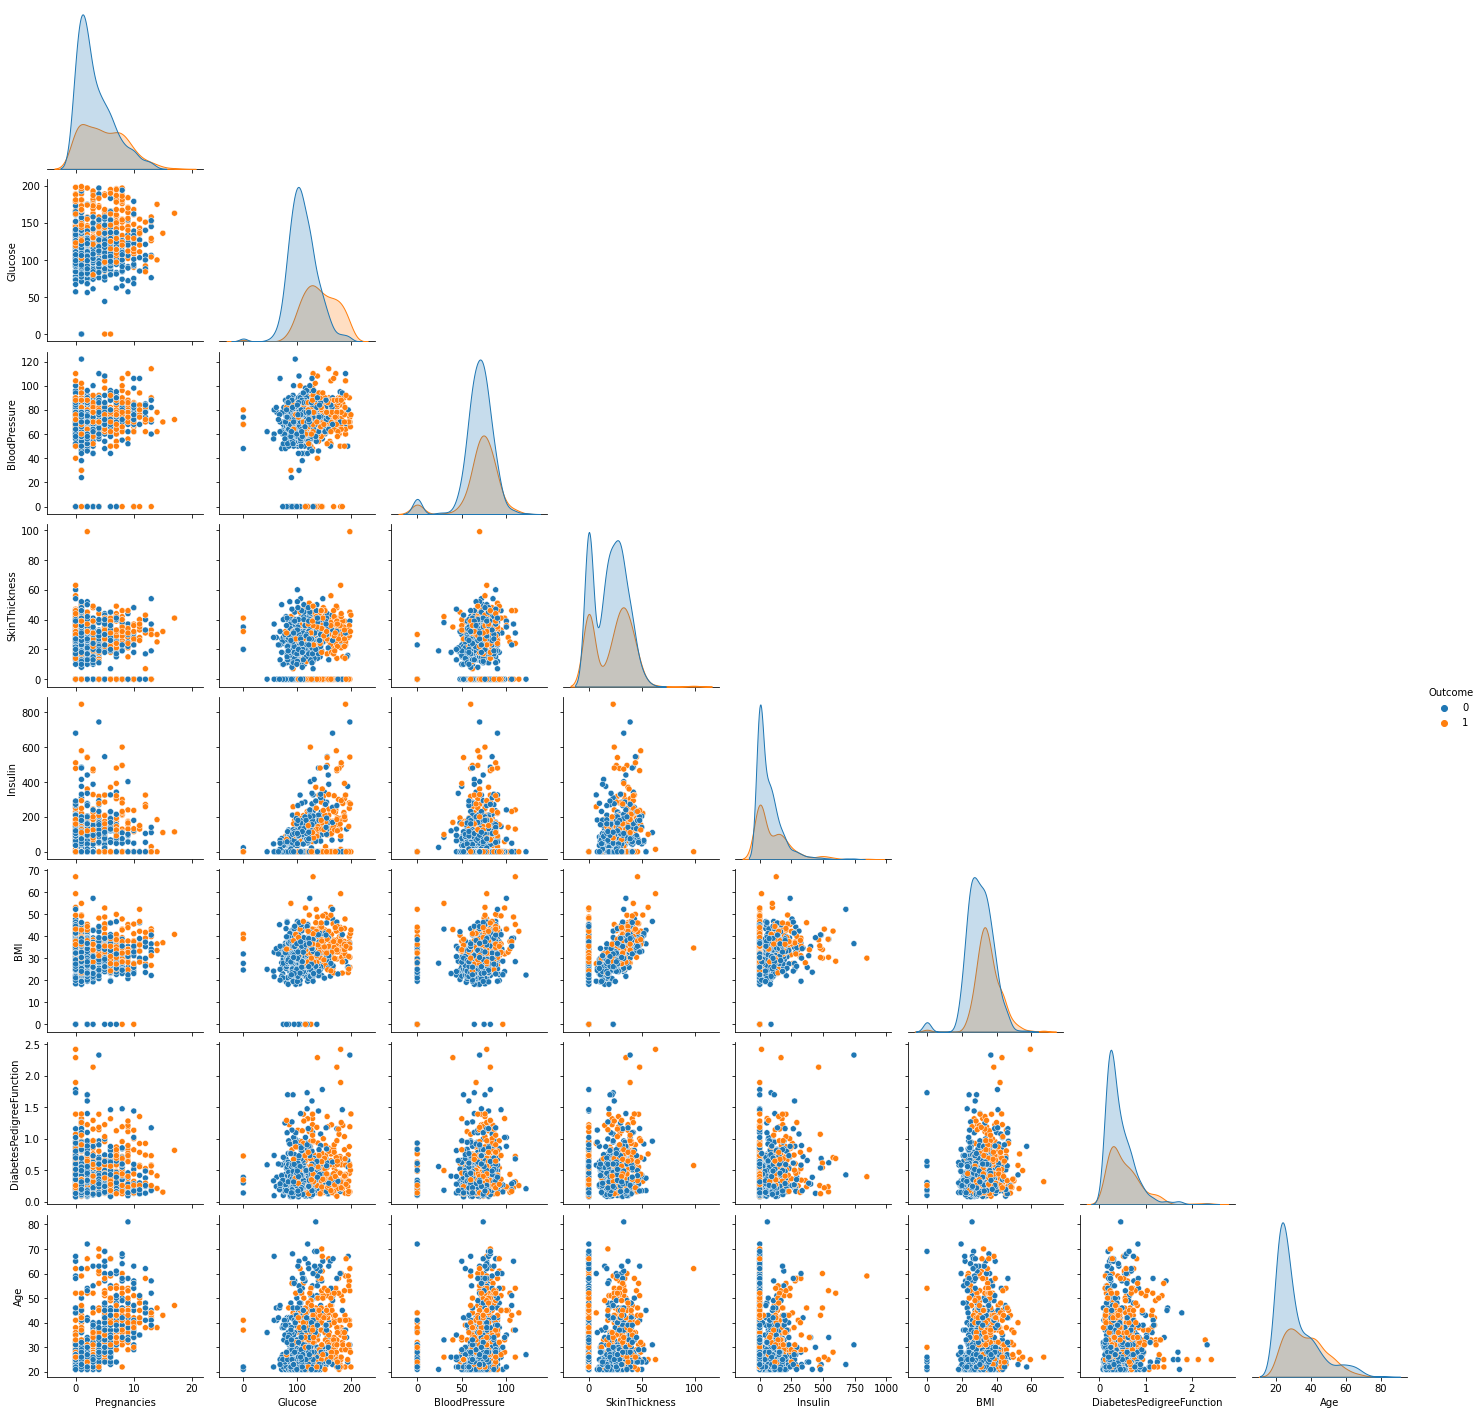

In [ ]:
sns.pairplot(data =df, hue='Outcome',corner=True) # Naranja = Personas con diabetes | Azul = personas que  no tienen diabetes
# La glucosa es la variable que separa mejor a las personas tienen diabetes
plt.show()

## Preprocesamiento

### Normalización de los datos

In [ ]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled,columns= df.keys())
df_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Igualar resultados de Outcome

In [ ]:
# Al final esto ya no sirvió para los modelos, pero aquí está el procedimiento que utilizamos
import random
random.seed(123)

def emparejarRegistros(datos, clase):
  """
    Sirve para igualar números de registros para datos de tipo 1 y 0 (sí o no)
    datos (pandas dataframe)
    clase (string)
  """

  datos_si = datos[datos[clase] == 1]
  datos_no = datos[datos[clase] == 0]

#Plis no pregunten como sirvió esto (es stack overflow :D), pero quita registros de manera aleatoria hasta que sean iguales
  if datos_si.shape[0] > datos_no.shape[0] :
    while datos_si.shape[0] > datos_no.shape[0] :
      n = random.randint(0, datos_si.shape[0] - 1)
      datos_si.drop([n], axis = 0, inplace=True)
      datos_si.reset_index(drop=True, inplace=True)
  elif datos_si.shape[0] < datos_no.shape[0] :
    while datos_si.shape[0] < datos_no.shape[0] :
      n = random.randint(0, datos_no.shape[0] - 1)
      datos_no.drop([n], axis=0,inplace=True)
      datos_no.reset_index(drop=True, inplace=True)

  datos_igual = datos_si.append(datos_no)
  return datos_igual

In [ ]:
# df_reducido = emparejarRegistros(df_scaled,'Outcome')

La función anterior a veces sirve y a veces no. Pero cumple con la igualación de registros de casos positivos y negativos. Sin embargo, al correr los modelos eran muy pocos datos para entrenar, por lo que no tenían buena precisión.

Así que optamos por dejarla comentada.

In [ ]:
# df_reducido.head(10)

In [ ]:
# sns.countplot(x='Outcome',data=df_reducido)
# plt.show()
# df_reducido[df_reducido['Outcome'] == 1 ].shape

## Modelado

### Red Neuronal MLP

In [ ]:
vias = 20 # validación cruzada usando 20 vias con una estrategia de bootstrap (bootstrap es para obtener de forma iterativa el area bajo la curva  y la precisión del modelo)
X = df_scaled[['Glucose','Insulin','BMI','Age']]
y = df_scaled['Outcome'].values


In [ ]:
#  Utilizamos 1 capa oculta de 5 neuronas
clf = MLPClassifier(solver='lbfgs', alpha = 1e-5, max_iter = 10000, #lbfgs --> regresion logistica
                    hidden_layer_sizes=(5),random_state=1, activation='relu') # MLP --> Clasificador Basado en Maquinas de Soporte Vectorial

In [ ]:
auc_NN = np.zeros(vias)
acc_NN = np.zeros(vias)

for vv in range(vias): #Va a encontrar la función optima
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30) # 30% Prueba y 70% Entrenamiento
  clf.fit(X_train,y_train) # Se ajusta el modelo (Fase de entrenamiento)
  y_predict = clf.predict(X_test) # Tiene la etiqueta de salida
  y_predict_proba = clf.predict_proba(X_test) # Valores de probabilidad de que las observaciones nuevas pertenescan a una cierta clase

  if(vv == 10): # Es para ver que es lo que está pasando en los pasos intermedios
    print('Prediccion: ',y_predict[:10])
    print('Datos Reales: ',y_test[:10])

  auc_NN[vv] = roc_auc_score(y_true=y_test,y_score=y_predict_proba[:,1]) # Calcular el area bajo la curva --> Al final tendremos 20 valore de area bajo la curva para medir el desempeño del modelo
  acc_NN[vv] = accuracy_score(y_true=y_test, y_pred=y_predict,normalize=True) # Calcular la probabilidad de accuracy --> Al final tendremos 20 valores de accuracy para medir el desempeño del modelo

print('Area bajo la curva: %0.4f'% auc_NN.mean(), 'sd: %0.4f'%auc_NN.std()) # Area bajo la curva
print('Accurracy: %0.4f'% acc_NN.mean(), 'sd: %0.4f'%acc_NN.std()) # accuracy del 76.77 %

Prediccion:  [1. 0. 1. 1. 1. 0. 0. 0. 1. 0.]
Datos Reales:  [1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
Area bajo la curva: 0.8283 sd: 0.0303
Accurracy: 0.7701 sd: 0.0292


### Modelos de Clasificación

In [ ]:
X = df_scaled.drop(['Outcome'],axis=1).values
y = df_scaled['Outcome'].values

# Paso 2. Crear conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [ ]:
# El siguiente código entrena y prueba 5 clasificadores utilizando los parámetros por default.
classification_models = {'Logistic Regression': LogisticRegression(),
                         'Decision Tree': DecisionTreeClassifier(),
                         'KNN': KNeighborsClassifier(),
                         'Random Forest':RandomForestClassifier(n_estimators=100, random_state=2),
                         'K Means': KMeans(n_clusters=2) #No supervisado
                         }

for name, model in classification_models.items():

    print(f'------ {name} ------')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100

    print(f'Test accuracy = {accuracy:.2f} %\n')

------ Logistic Regression ------
Test accuracy = 81.82 %

------ Decision Tree ------
Test accuracy = 77.27 %

------ KNN ------
Test accuracy = 77.92 %

------ Random Forest ------
Test accuracy = 81.17 %

------ K Means ------
Test accuracy = 29.87 %



Debido a la disparidad en la clase (postivos y negativos) el modelo tiende a predecir diagnósticos negativos cuando realmente son positivos. Si se intenta equilibrar, las muestras ya no son suficientes y el rendimiento del modelo cae mucho.

### Logistic Regression (1 variable)

In [ ]:
X = df_scaled[['Glucose']]
y = df_scaled['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

logistic_1v = LogisticRegression(multi_class='ovr', solver='lbfgs')
logistic_1v.fit(X_train, y_train)
y_pred = logistic_1v.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

print(confusion_matrix(y_true=y_test, y_pred=y_pred))

0.7662337662337663
[[97 10]
 [26 21]]


### Logistic Regression

In [ ]:
X = df_scaled.drop(['Outcome'],axis=1).values
y = df_scaled['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [ ]:
print('Shape for training data', X_train.shape, y_train.shape)
print('Shape for testing data', X_test.shape, y_test.shape)

Shape for training data (614, 8) (614,)
Shape for testing data (154, 8) (154,)


In [ ]:
model = LogisticRegression(multi_class='ovr', solver='lbfgs')
model.fit(X_train, y_train)
predicted=model.predict(X_test)

print("The accuracy of Logistic Regression is : {:.2f} %".format(accuracy_score(y_test, predicted)*100))

The accuracy of Logistic Regression is : 81.82 %


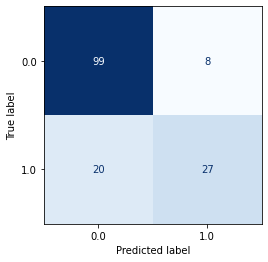

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,
                                        predicted,
                                        cmap='Blues',
                                        colorbar=False)
plt.show()

### Desicion Tree

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Fit the classifier with default hyper-parameters
X = df.drop(['Outcome'],axis=1).values
y = df['Outcome'].values
clf = DecisionTreeClassifier(random_state=1234,max_depth=3)
model = clf.fit(X, y)

In [ ]:
features = df.drop(['Outcome'],axis=1)

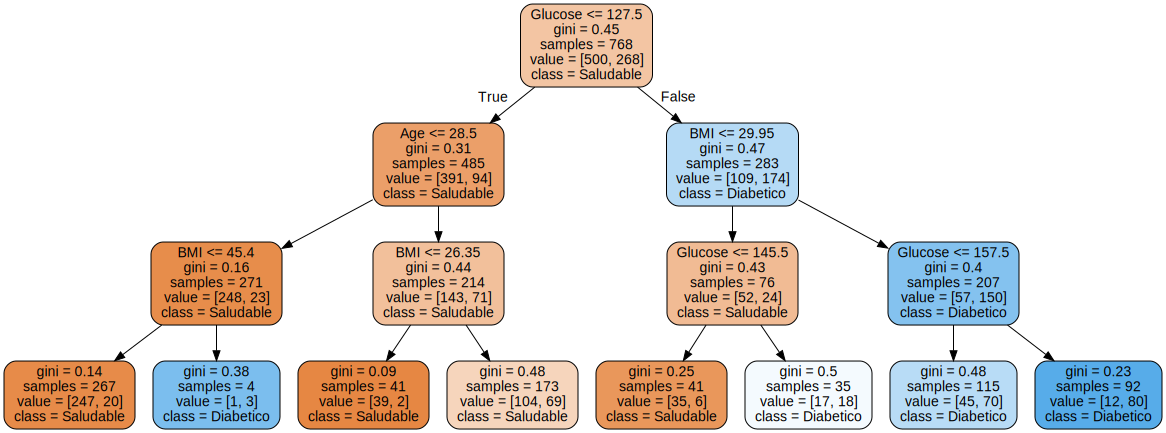

<Figure size 1800x1440 with 0 Axes>

In [ ]:
import graphviz
# DOT data
file_name = 'tree1'
fig = plt.figure(figsize=(25,20))
dot_data = export_graphviz(clf, out_file=None,
                                feature_names=features.columns.values,
                                class_names=["Saludable","Diabetico"],rounded = True, proportion = False,
                    precision = 2, filled = True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_graphivz")
graph